# Data Mining : Homework 4 
#### Elaheh Toulabi Nejad   |   9631243

<hr style = "border-top: 4px solid #000000 ; border-radius: 3px;">

## 1. Decision Tree Classifier

### a)

#### Reading dataset

In [1]:
import pandas as pd

In [2]:
raw_df = pd.read_csv('Vehicle.csv')
print("Shape : " ,raw_df.shape)
raw_df.head()

Shape :  (846, 19)


,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
در این بخش دیتاست را خوانده و به دیتافریم تبدیل می کنیم.
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


### b)

#### Handling Missing Values

In [3]:
raw_df.isnull().sum()

COMPACTNESS                  0
CIRCULARITY                  0
DISTANCE_CIRCULARITY         0
RADIUS_RATIO                 0
PR.AXIS_ASPECT_RATIO         0
MAX.LENGTH_ASPECT_RATIO      0
SCATTER_RATIO                0
ELONGATEDNESS                0
PR.AXIS_RECTANGULARITY       0
MAX.LENGTH_RECTANGULARITY    0
SCALED_VARIANCE_MAJOR        0
SCALED_VARIANCE_MINOR        0
SCALED_RADIUS_OF_GYRATION    0
SKEWNESS_ABOUT_MAJOR         0
SKEWNESS_ABOUT_MINOR         0
KURTOSIS_ABOUT_MAJOR         0
KURTOSIS_ABOUT_MINOR         0
HOLLOWS_RATIO                0
Class                        0
dtype: int64

In [4]:
raw_df['Class'].value_counts()

bus     218
saab    217
opel    212
van     199
Name: Class, dtype: int64

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
 همانطور که مشخص است داده missing در دیتاست وجود ندارد.
  همینطور با توجه به محموع تعداد هرکدام از مقادیر یکتا که برابر است به تعداد کل رکوردها می توان فهمید که در ستون کلاس null نداریم.
    این تحلیل را برای سایر ستون ها هم می توان انجام داد.
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


#### Normalizing Numerical Columns and Encoding Categorical Ones and  Removing Outliers

In [5]:
raw_df.dtypes

COMPACTNESS                   int64
CIRCULARITY                   int64
DISTANCE_CIRCULARITY          int64
RADIUS_RATIO                  int64
PR.AXIS_ASPECT_RATIO          int64
MAX.LENGTH_ASPECT_RATIO       int64
SCATTER_RATIO                 int64
ELONGATEDNESS                 int64
PR.AXIS_RECTANGULARITY        int64
MAX.LENGTH_RECTANGULARITY     int64
SCALED_VARIANCE_MAJOR         int64
SCALED_VARIANCE_MINOR         int64
SCALED_RADIUS_OF_GYRATION     int64
SKEWNESS_ABOUT_MAJOR          int64
SKEWNESS_ABOUT_MINOR          int64
KURTOSIS_ABOUT_MAJOR          int64
KURTOSIS_ABOUT_MINOR          int64
HOLLOWS_RATIO                 int64
Class                        object
dtype: object

In [6]:
from sklearn.preprocessing import normalize

In [7]:
numericals = pd.DataFrame(raw_df.loc[:, raw_df.columns != 'Class'])
categoricals = pd.DataFrame(raw_df['Class'])

#Encoding :

#sequence : bus(0) < opel(1) < saab(2) < van(3) 
dict_class = {"Class": {"bus": 0, "opel": 1, "saab": 2, "van": 3}}
raw_df.replace(dict_class, inplace=True)
raw_df.head()



,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,3
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,2
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,3
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,0


In [8]:


#remove outlires
print("Before Removing Outliers: ",raw_df.shape)
Q1 = raw_df.loc[:, raw_df.columns != 'Class'].quantile(0.25)
Q3 = raw_df.loc[:, raw_df.columns != 'Class'].quantile(0.75)
IQR = Q3 - Q1 
mask = ~((raw_df < (Q1 - 1.5 * IQR)) | (raw_df > (Q3 + 1.5 * IQR))).any(axis=1)
print("#Outliers = ",raw_df[~mask].dropna().shape[0])
print("#Not outliers = ",raw_df.shape[0]-raw_df[~mask].dropna().shape[0])

raw_df= raw_df[mask]
print("After Removing Outliers: ",raw_df.shape)
raw_df.head()

Before Removing Outliers:  (846, 19)
#Outliers =  33
#Not outliers =  813
After Removing Outliers:  (813, 19)


<ipython-input-8-5b6ac3ce732b>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  mask = ~((raw_df < (Q1 - 1.5 * IQR)) | (raw_df > (Q3 + 1.5 * IQR))).any(axis=1)
<ipython-input-8-5b6ac3ce732b>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  mask = ~((raw_df < (Q1 - 1.5 * IQR)) | (raw_df > (Q3 + 1.5 * IQR))).any(axis=1)


,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,3
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,2
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,3
5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,0


In [9]:
numericals = pd.DataFrame(raw_df.loc[:, raw_df.columns != 'Class'])
categoricals = pd.DataFrame(raw_df['Class'])

#normalize
raw_df.loc[:, raw_df.columns != 'Class'] = normalize(numericals, norm='l2')

df=raw_df
df.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,0.150904,0.076246,0.131843,0.282747,0.114370,0.015885,0.257332,0.066716,0.031769,0.252566,0.279570,0.602029,0.292278,0.111193,0.009531,0.025415,0.297043,0.312928,3
1,0.158697,0.071501,0.146489,0.245893,0.099403,0.015695,0.259844,0.078476,0.033134,0.249380,0.296466,0.575493,0.275539,0.125562,0.015695,0.024415,0.329601,0.347040,3
2,0.122330,0.058812,0.124682,0.245836,0.077632,0.011762,0.243483,0.037640,0.027054,0.185847,0.262303,0.746917,0.258774,0.085866,0.016467,0.010586,0.221134,0.230544,2
3,0.166015,0.073190,0.146379,0.283833,0.112462,0.016066,0.257056,0.082115,0.033917,0.255271,0.285618,0.551599,0.226709,0.112462,0.010711,0.017851,0.355237,0.369518,3
5,0.094185,0.050174,0.093305,0.151401,0.044012,0.005281,0.224461,0.022886,0.024647,0.148760,0.246466,0.842387,0.232383,0.074820,0.004401,0.007922,0.159323,0.161083,0


<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


<p style =" direction:rtl;text-align:right;">
مقادیر عددی به کمک متد normalize نرمال شده اند.
برای مقادیر کتگوریکال که شامل ستون Class میشود می توانیم dummy values ها را محاسبه و به کمک one-hot-vector ها این کار را انجام دهیم که برای هر رکورد یکی از مفادیر 1 باشد اما چون  متغیرهای هدف چندتا می شوند و کار مدلسازی دشوار تر می شود با یک فرض که در کامت کد نوشته شده مقادیر را جایگذاری می کنیم و سپس مقادیر نرمال شده و انکود شده را با هم کانکت و به یک دیتافریم جدید تبدیل می کنیم.
    میشد از متدهای دیگر نرمال سازی مانند StandardScaler اما با تست متوجه شدم نتیجه بدتری می دهد. 
</p>


<p style =" direction:rtl;text-align:center;">
    <strong>sequence : bus(0) < opel(1) < saab(2) < van(3) 
 </strong>
</p>
<p style =" direction:rtl;text-align:right;">
همچنین outlier ها را به کمک روش IQR پیدا و حذف کرده ایم.
</p>
<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


### c)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

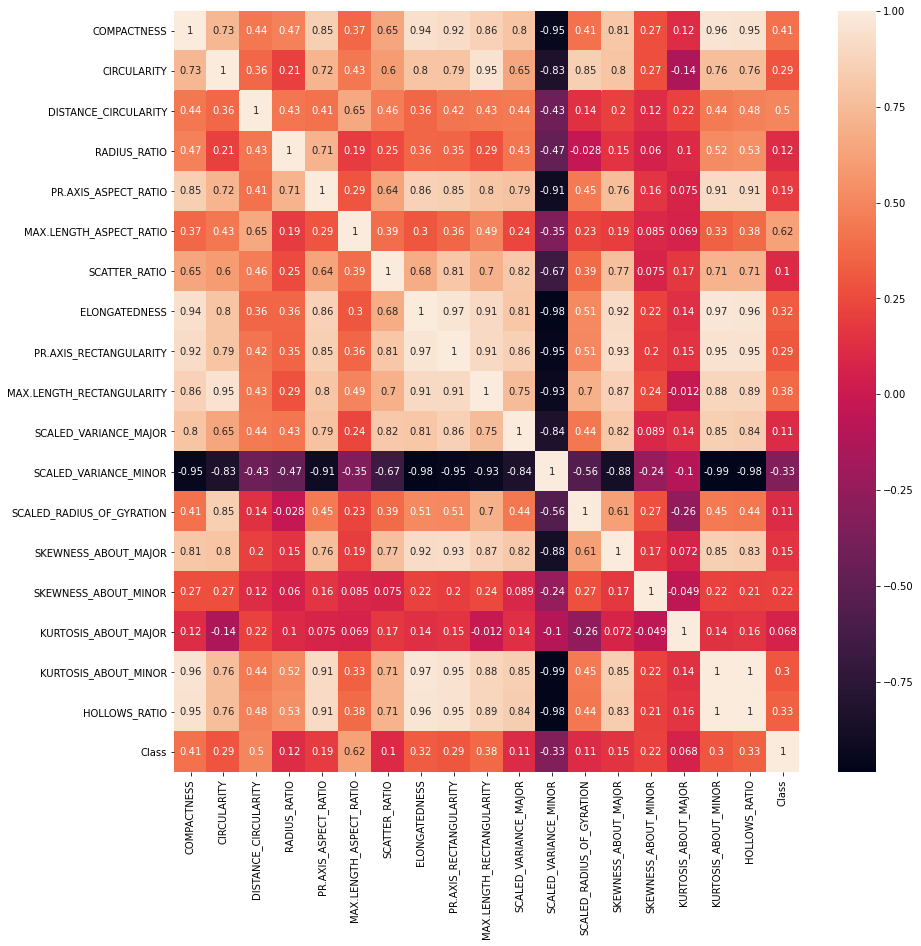

In [11]:
corrMatrix = df.corr()
fig, axes = plt.subplots(1,1,figsize=(14,14))
sns.heatmap(corrMatrix, annot=True)

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
می توان گفت ستون هایی که بیشترین همبستگی را با متغیر هدف دارند بیشترین اثر را روی پیش بینی آن می گذارند. مثلا Distance circularity   وMAX.LENGTH_ASPECT_RATIO و compactness
    اما در نهایت برای درخت تصمیم این الگوریتم است که اهمیت ویزگی ها را مشخص می کند.
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


### d)

In [12]:
Y = df['Class']
X = df.drop('Class', axis=1)

### e)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [15]:
print('Distribution of defferent classes in training data:(%) ')
y = pd.DataFrame(y_train)
a = pd.DataFrame(((y.groupby('Class')['Class'].count())/y_train.shape[0])*100)
a

Distribution of defferent classes in training data:(%) 


,Class
Class,
0,25.692308
1,25.538462
2,25.384615
3,23.384615


In [16]:
print('Distribution of defferent classes in test data:(%) ')
y = pd.DataFrame(y_test)
b= pd.DataFrame(((y.groupby('Class')['Class'].count())/y_test.shape[0])*100)
b

Distribution of defferent classes in test data:(%) 


,Class
Class,
0,25.153374
1,25.766871
2,26.380368
3,22.699387


<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
به کمک تابع  train_test_split داده ها را به دو بخش آموزشی و تست با نسبت خواسته شده تقسیم می کنیم.سپس درصد وجود هر کلاس را در داده های آموزش و تست محاسبه می کنیم.
    همانطور که مشحص است هر کدام از این دسته ها درصدهای نزدیک به همی در دو نوع داده دارند
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


### f)

In [17]:
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

In [27]:
mytree = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=9,max_depth=10).fit(X_train,y_train)

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
درخت تصمیم را با پارامترهای گفته شده در سوال می سازیم .
    در این قسمت برای بهترشدن تقسیم ها در درخت بیشینه تعداد برگ را 8 و عمق را 6 در نظر گرفته ایم و این را با آزمون به دست آوردیم.
    سپس داده ها را برای آموزش به مدل دادیم.

</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


### g)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [28]:
y_predicted = mytree.predict(X_test)
print("[+] confusion matrix\n")
print(confusion_matrix(y_test, y_predicted))
print("\n[+] classification report\n")
print(classification_report(y_test, y_predicted))

[+] confusion matrix

[[37  0  4  0]
 [ 3 10 25  4]
 [ 3  1 36  3]
 [ 0  2  2 33]]

[+] classification report

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        41
           1       0.77      0.24      0.36        42
           2       0.54      0.84      0.65        43
           3       0.82      0.89      0.86        37

    accuracy                           0.71       163
   macro avg       0.75      0.72      0.69       163
weighted avg       0.74      0.71      0.68       163



In [29]:
from sklearn.metrics import mean_squared_error
print("MSE is : ",mean_squared_error(y_predicted,y_test))

MSE is :  0.5276073619631901


In [30]:
print("Mean Accuracy = ",mytree.score(X_test,y_test,y_predicted))

Mean Accuracy =  0.6779026217228464


In [31]:
print("Accuracy Score = " ,accuracy_score(y_test, y_predicted))

Accuracy Score =  0.7116564417177914


<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
توضیح مفصل confusion matrix را در سوال های بعد ذکر خواهم کرد.
    اما در این مرحله خطای mse و دقت را به صورت فوق گزارش کرده ام که دقت حوالی 70 است.
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


### h)

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


<h4 style =" direction:rtl;text-align:right;">
max_features
</h4>
<p style =" direction:rtl;text-align:right;">

بیانگر تعداد فیچرهایی است که حین Split باید در نظر داشته باشیم.هر بار که الگوریتم ما می خواهد برای ساخت یک درخت تصمیم از نود فعلی دوشاخه بسازد اعدادی فیچر را بررسی می کند و هرکدام را که با split کردن بر اساس آن به مقدار بهتری برای شاخص gini یا entropy می رسیم برای مرحله بعد انتخاب میکند و split را براساس آن انجام می دهد. حال اگر بخواهد تمام فیچرها را بررسی کند هزینه محاسباتی زیادی به آلکوریتم تحمیل می شود. بخاطر همین به کمک این گزینه صرفا به بررسی برخی از این فیچرها اکتفا می کنیم که این احتمال over fitting را هم کاهش می دهد.البته باید توجه داشته باشیم که جستجو برای پیداکردن یک درخت با تقسیمات مناسب تا زمانی که یک جستجوی معتبر پیدا نشود ادامه پیدا می کند حتی اگر max_features این اجازه را ندهد.
     
</p>
<p style =" direction:rtl;text-align:right;">
    این پارامتر می تواند یکی از مقادیر زیر را داشته باشد:    

</p>

<p style =" direction:rtl;text-align:right;">
int: در هرگام max_features تا فیچر را درنظر میگیرد.
</p>
<p style =" direction:rtl;text-align:right;">
float: در هر گام int(max_features * n_features) فیچر  را در نظر می گیرد.
</p>    
    <p style =" direction:rtl;text-align:right;">
auto:  در هر گام sqrt(n_features) را در نظر می گیرد.
</p>    
    <p style =" direction:rtl;text-align:right;">
sqrt:در هر گام sqrt(n_features) را در نظر می گیرد.
</p>    
    <p style =" direction:rtl;text-align:right;">
log2: در هرگام log2(n_features) فیچر را در نظر می گیرد.</p>    
    <p style =" direction:rtl;text-align:right;">
None:  در هر گام n_features فیچر را در نظر می گیرد. 

</p>    
    
</p>

<h4 style =" direction:rtl;text-align:right;">
max_leaf_nodes
</h4>
<p style =" direction:rtl;text-align:right;">
تعداد کل نودهای برگ را مشخص می کند.
    به کمک آن می توان درخت را بصورت best-first بزرگ کرد و منظور از بهترین گره، گره با کمترین ناخالصی است.
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


### i)

In [32]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
import collections
from IPython.display import Image 

In [34]:
importance = mytree.feature_importances_
for i,v in enumerate(importance):
    print('Feature %0d (%s) :Score: %.5f' % (i,X_train.columns[i],v))

Feature 0 (COMPACTNESS) :Score: 0.02570
Feature 1 (CIRCULARITY) :Score: 0.00000
Feature 2 (DISTANCE_CIRCULARITY) :Score: 0.03879
Feature 3 (RADIUS_RATIO) :Score: 0.00000
Feature 4 (PR.AXIS_ASPECT_RATIO) :Score: 0.10451
Feature 5 (MAX.LENGTH_ASPECT_RATIO) :Score: 0.31704
Feature 6 (SCATTER_RATIO) :Score: 0.00000
Feature 7 (ELONGATEDNESS) :Score: 0.14060
Feature 8 (PR.AXIS_RECTANGULARITY) :Score: 0.00000
Feature 9 (MAX.LENGTH_RECTANGULARITY) :Score: 0.37335
Feature 10 (SCALED_VARIANCE_MAJOR) :Score: 0.00000
Feature 11 (SCALED_VARIANCE_MINOR) :Score: 0.00000
Feature 12 (SCALED_RADIUS_OF_GYRATION) :Score: 0.00000
Feature 13 (SKEWNESS_ABOUT_MAJOR) :Score: 0.00000
Feature 14 (SKEWNESS_ABOUT_MINOR) :Score: 0.00000
Feature 15 (KURTOSIS_ABOUT_MAJOR) :Score: 0.00000
Feature 16 (KURTOSIS_ABOUT_MINOR) :Score: 0.00000
Feature 17 (HOLLOWS_RATIO) :Score: 0.00000


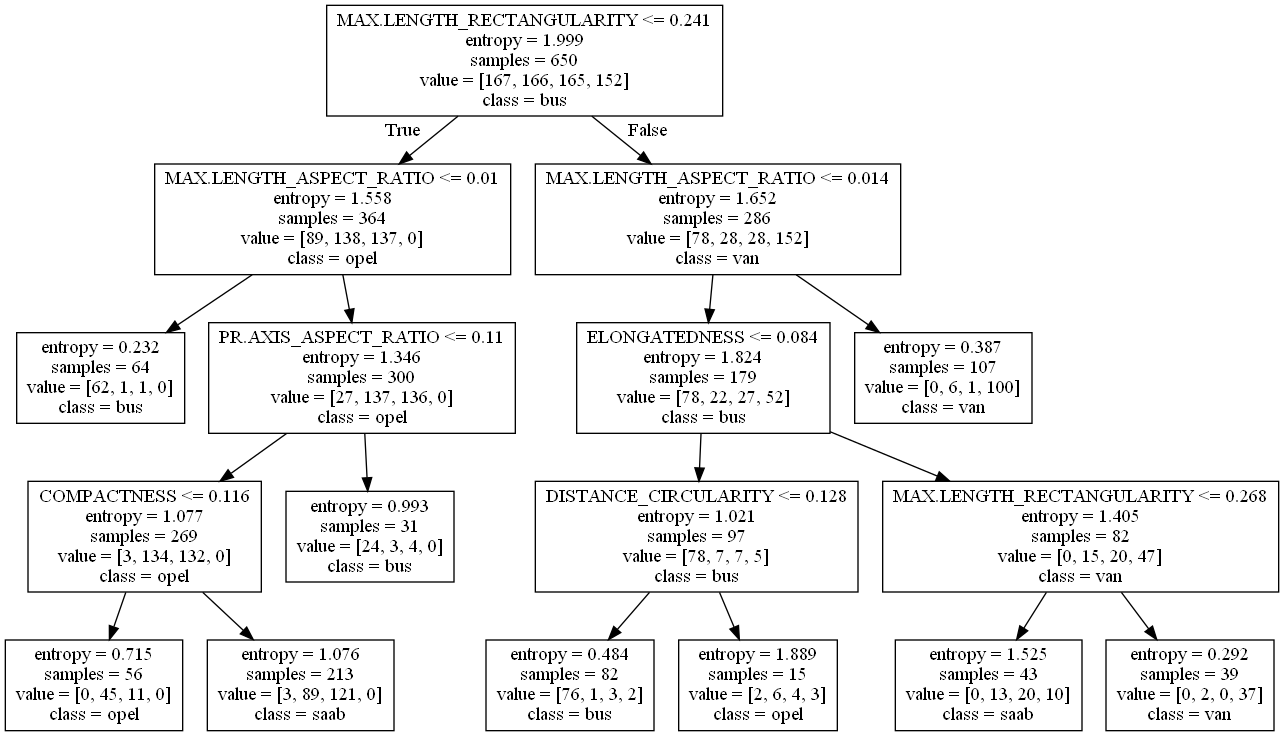

In [35]:
export_graphviz(mytree, out_file="tree.dot", class_names=["bus","opel","saab", "van"],feature_names=X_test.columns)
with open("tree.dot") as f:
    dot_graph = f.read()

graph = pydotplus.graph_from_dot_data(dot_graph)
colors = ('turquoise', 'pink')
edges = collections.defaultdict(list)
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
for edge in edges:
    edges[edge].sort() 
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
graph.write_png('mytree.png')
Image(graph.create_png())


<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
در این بخش ابتدا اهمیت ویژگی ها برای الگوریتم را نمایش داده ایم.
سپس به کمک کتابخانه های گفته شده درخت را رسم کرده ایم.
ابتدا graph_dot ی را که در بخش قبل از فایلdot.tree خواندیم به شکل یک گراف در متغیرgraph ذخیره
می کنیم. سپس پالت رنگی برای رسم را تعیین می کنیم.برای یال هایی که در گرافgraph وجود دارد مبدا و
مقصد آنها را یه هم وصل می کنیم و سپس گراف را مرتب و رنگ آمیزی می کنیم.درنهایت آن را به عنوان یک
عکس ذخیره و با خواندن غکس نمایش می دهیم.

</p>

<p style =" direction:rtl;text-align:right;">
آنچه در این درخت مشهود است این است که به توجه به ترتیب اهمیتی که خود الگوریتم برای ویژگی ها قائل شده است آنها را به ترتیب بررسی می کند و فرزندان هر نود را می شازد.
   هرچه انتروپی هر نود کمتر باشد Split بهتر و خالص تری را شاهدیم.
    در این درخت برای مثال الگوریتم متوجه شده است که با بررسی ویزگی که در ریشه قرار داده میتواند به تفکیک خالص تری از کلاس ها برسد پس ایتدا آن را بررسی کرده و همینطور تا ساخت کل درخت ادامه داده است.
</p>

<p style =" direction:rtl;text-align:right;">
این split ها تا حد زیادی مبنایی مشابه نمودار heatmap دارد</p>
<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">
